# Planets and Moons Dataset - AI in Space 🌌 🛰 ☄ 🔭
---
## Dataset
The Planets and Moons dataset consists of approximately 8 confirmed planets, 2 dwarf planets, and 1 Earth's moon, the Moon. It includes 11 classes in total.

There are 149 photos of each planet in 3D. All photos are optimized and ready for convolution for AI applications.

Annotations are licensed by Emirhan BULUT under a CC BY-NC 4.0 license. This software and dataset cannot be used for commercial purposes without permission.

Images are listed as licensed CC BY-NC 4.0. The dataset was collected by Emirhan BULUT. The dataset was compiled and collected in accordance with the sensitivity parameters.

## Artificial Intelligence (AI) Software in Space
The software has been prepared with a 100% accuracy, 0.0025 Loss result, superior to most ready-made models.

Emirhan BULUT

Senior Artificial Intelligence Engineer

##**The coding language used:**

`Python 3.9.8`

##**Libraries Used:**

`NumPy`

`Pandas`

`Tensorflow-Keras`

`Glob`

`Seaborn`

`Matplotlib`

`Os`

<img class="fit-picture"
     src="https://raw.githubusercontent.com/emirhanai/Planets-and-Moons-Dataset-AI-in-Space-/main/Planets%20and%20Moons%20Dataset%20-%20AI%20in%20Space%20%F0%9F%8C%8C%20%F0%9F%9B%B0%20%E2%98%84%20%F0%9F%94%AD.png"
     alt="Planets and Moons Dataset - AI in Space 🌌 🛰 ☄ 🔭 - Emirhan BULUT">
     
### **Developer Information:**

Name-Surname: **Emirhan BULUT**

Contact (Email) : **emirhan@isap.solutions**

LinkedIn : **[https://www.linkedin.com/in/artificialintelligencebulut/][LinkedinAccount]**

[LinkedinAccount]: https://www.linkedin.com/in/artificialintelligencebulut/

Kaggle: **[https://www.kaggle.com/emirhanai][Kaggle]**

Official Website: **[https://www.emirhanbulut.com.tr][OfficialWebSite]**

[Kaggle]: https://www.kaggle.com/emirhanai

[OfficialWebSite]: https://www.emirhanbulut.com.tr

## 💽 Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ⬇️ Data Download

In [ ]:
!unzip /content/Planets_Moons_Data.zip

Archive:  /content/Planets_Moons_Data.zip
   creating: Planets_Moons/
   creating: Planets_Moons/Earth/
  inflating: Planets_Moons/Earth/Earth (1).jpg  
  inflating: Planets_Moons/Earth/Earth (10).jpg  
  inflating: Planets_Moons/Earth/Earth (100).jpg  
  inflating: Planets_Moons/Earth/Earth (101).jpg  
  inflating: Planets_Moons/Earth/Earth (102).jpg  
  inflating: Planets_Moons/Earth/Earth (103).jpg  
  inflating: Planets_Moons/Earth/Earth (104).jpg  
  inflating: Planets_Moons/Earth/Earth (105).jpg  
  inflating: Planets_Moons/Earth/Earth (106).jpg  
  inflating: Planets_Moons/Earth/Earth (107).jpg  
  inflating: Planets_Moons/Earth/Earth (108).jpg  
  inflating: Planets_Moons/Earth/Earth (109).jpg  
  inflating: Planets_Moons/Earth/Earth (11).jpg  
  inflating: Planets_Moons/Earth/Earth (110).jpg  
  inflating: Planets_Moons/Earth/Earth (111).jpg  
  inflating: Planets_Moons/Earth/Earth (112).jpg  
  inflating: Planets_Moons/Earth/Earth (113).jpg  
  inflating: Planets_Moons/Earth/

## 📥 > 📙 Import to Libraries

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential
import tensorflow as tf

## 📋 Data Preparing

In [ ]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
test_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
train_generator = train_datagen.flow_from_directory("/content/Planets and Moons",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos",
                                                    subset="training")
test_generator = train_datagen.flow_from_directory("/content/Planets and Moons",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos",
                                                    subset="validation")

Found 1638 images belonging to 11 classes.
Found 1638 images belonging to 11 classes.


## 🧱 Models Structure and Code [Function]

In [ ]:
def emir_model():
  inp = Input(shape = (256,256,3))

  x = Conv2D(128, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(inp)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(256, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(512, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Flatten()(x)
  x = Dense(128, activation='ReLU')(x)
  x = Dense(11, activation='softmax')(x)

  model = Model(inputs=inp, outputs= x)
  return model

In [ ]:
def func(name_model):

    print('#####~Model => {} '.format(name_model))

    model = emir_model()
    model.summary()

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    my_callbacks  =  [keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=48,
                        callbacks=my_callbacks,
                        verbose=1,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [ ]:
def func(pre,name_model):
    print('#####~Model => {} '.format(name_model))
    pre_model = name_model(input_shape=(256,256, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input
    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(11, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]
    
    history = model.fit(train_generator,validation_data=test_generator,epochs=48,callbacks=my_callbacks,verbose=0)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

## 🏃‍♂️ Prep Models and My Model Benchmark Scores

### Model Emirhan

#####~Model => Planets_Moon_Detection_Artificial_Intelligence 
Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_348 (Conv2D)         (None, 128, 128, 128)     1664      
                                                                 
 batch_normalization_366 (Ba  (None, 128, 128, 128)    512       
 tchNormalization)                                               
                                                                 
 spatial_dropout2d_83 (Spati  (None, 128, 128, 128)    0         
 alDropout2D)                                                    
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                        

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/48
13/13 [==============================] - 11s 830ms/step - loss: 1.7514 - accuracy: 0.3608 - val_loss: 2.0710 - val_accuracy: 0.2955
Epoch 2/48
13/13 [==============================] - 10s 779ms/step - loss: 0.5631 - accuracy: 0.7839 - val_loss: 1.7708 - val_accuracy: 0.3223
Epoch 3/48
13/13 [==============================] - 10s 779ms/step - loss: 0.2869 - accuracy: 0.8822 - val_loss: 1.6739 - val_accuracy: 0.6050
Epoch 4/48
13/13 [==============================] - 10s 781ms/step - loss: 0.1757 - accuracy: 0.9383 - val_loss: 1.5393 - val_accuracy: 0.9219
Epoch 5/48
13/13 [==============================] - 10s 785ms/step - loss: 0.1354 - accuracy: 0.9469 - val_loss: 1.4385 - val_accuracy: 0.8645
Epoch 6/48
13/13 [==============================] - 10s 776ms/step - loss: 0.0936 - accuracy: 0.9676 - val_loss: 1.3138 - val_accuracy: 0.9084
Epoch 7/48
13/13 [==============================] - 10s 778ms/step - loss: 0.0717 - accuracy: 0.9737 - val_loss: 1.1815 - val_accuracy: 0.9799

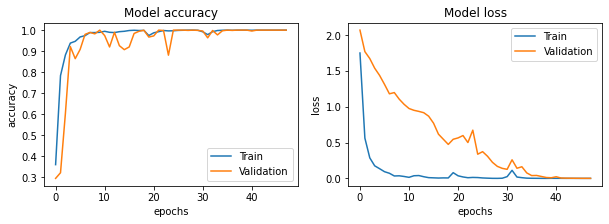

              Classification_report 
              Results 
    Test Loss:  0.00063  
Test Accuracy:  100.00%  


In [ ]:
model_name = "Planets_Moon_Detection_Artificial_Intelligence"
result_emirhan = func(model_name)

### VGG19

#####~Model => <function VGG19 at 0x7f71d3f86f80> 
80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


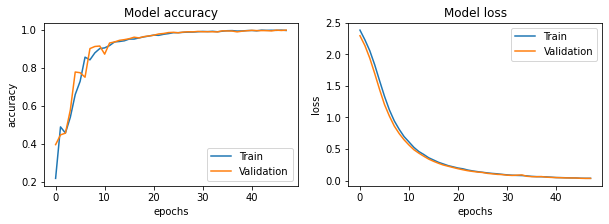

              Classification_report 
              Results 
    Test Loss:  0.03383  
Test Accuracy:  99.88%  


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
result_VGG19 = func(preprocess_input,VGG19)

### VGG16

#####~Model => <function VGG16 at 0x7f71d3f86b00> 
58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


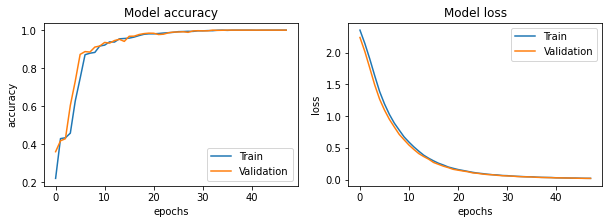

              Classification_report 
              Results 
    Test Loss:  0.01971  
Test Accuracy:  100.00%  


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
result_VGG16 = func(preprocess_input,VGG16)

### ResNet50

#####~Model => <function ResNet50 at 0x7f71d3f80b90> 
94781440/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


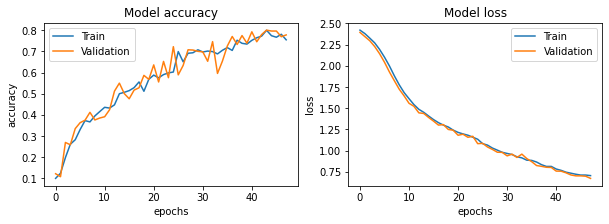

              Classification_report 
              Results 
    Test Loss:  0.67278  
Test Accuracy:  77.78%  


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
result_ResNet50 = func(preprocess_input,ResNet50)

### ResNet101

#####~Model => <function ResNet101 at 0x7f71d3f80c20> 
171458560/171446536 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


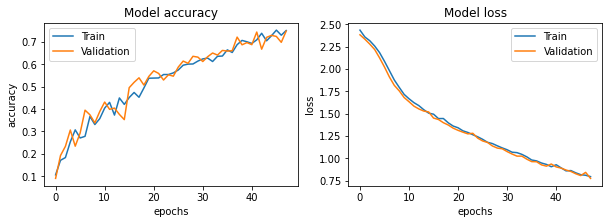

              Classification_report 
              Results 
    Test Loss:  0.77611  
Test Accuracy:  74.73%  


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
result_ResNet101 = func(preprocess_input,ResNet101)

### MobileNet

#####~Model => <function MobileNet at 0x7f71d3f649e0> 


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


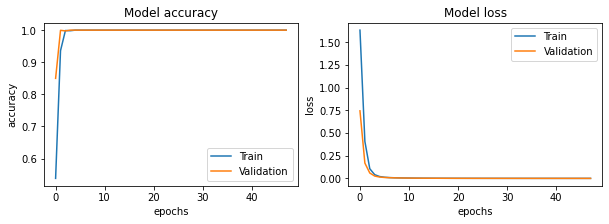

              Classification_report 
              Results 
    Test Loss:  0.00027  
Test Accuracy:  100.00%  


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
result_MobileNet = func(preprocess_input,MobileNet)

### DenseNet201

#####~Model => <function DenseNet201 at 0x7f71d3fc6950> 
74850304/74836368 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


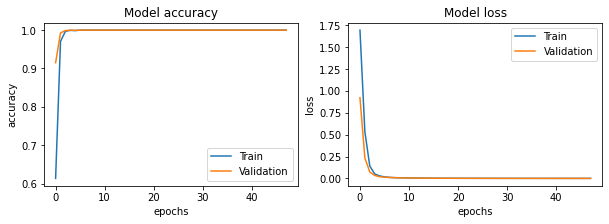

              Classification_report 
              Results 
    Test Loss:  0.00031  
Test Accuracy:  100.00%  


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
result_DenseNet201 = func(preprocess_input,DenseNet201)

### EfficientNetB7

#####~Model => <function EfficientNetB7 at 0x7f71d3f4eb00> 
258088960/258076736 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


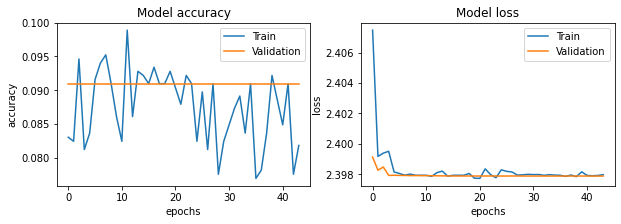

              Classification_report 
              Results 
    Test Loss:  2.39789  
Test Accuracy:  9.10%  


In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
result_Eff = func(preprocess_input,EfficientNetB7)

### Xception

#####~Model => <function Xception at 0x7f71d3f0e560> 
83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


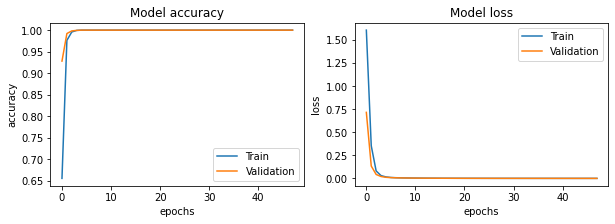

              Classification_report 
              Results 
    Test Loss:  0.00026  
Test Accuracy:  100.00%  


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
result_Xception = func(preprocess_input,Xception)

### InceptionResNetV2

#####~Model => <function InceptionResNetV2 at 0x7f71d3f60680> 
219070464/219055592 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


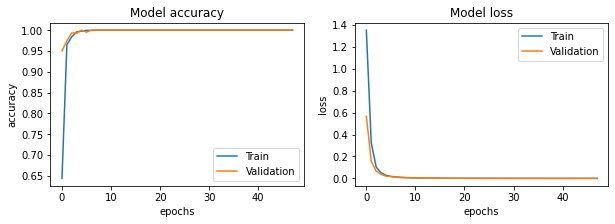

              Classification_report 
              Results 
    Test Loss:  0.00032  
Test Accuracy:  100.00%  


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
result_InResNetV2 = func(preprocess_input,InceptionResNetV2)

## 📊 Finally Result of Table (DataFrame - Pandas)

In [ ]:
accuracy_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Accuracy':[result_emirhan[1],result_VGG16[1], result_VGG19[1], result_ResNet50[1], result_ResNet101[1],
                                  result_MobileNet[1],result_InResNetV2[1],result_DenseNet201[1],result_Xception[1],
                                 result_Eff[1]]})

In [ ]:
accuracy_result_table

,Model,Accuracy
0,Emirhan_Model,1.000000
1,VGG16,1.000000
2,VGG19,0.998779
3,ResNet50,0.777778
4,ResNet101,0.747253
5,MobileNet,1.000000
6,InceptionResNetV2,1.000000
7,DenseNet201,1.000000
8,Xception,1.000000
9,EfficientNetB7,0.090965


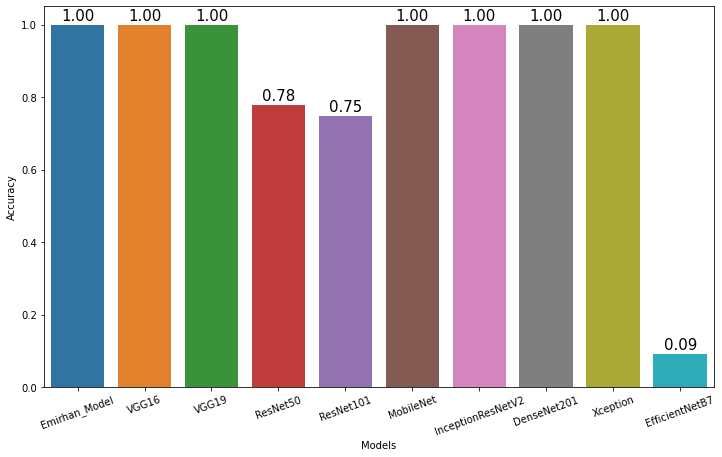

In [ ]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=accuracy_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);

In [ ]:
loss_result_table = pd.DataFrame({'Model':['Emirhan_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Loss':[result_emirhan[0],result_VGG16[0], result_VGG19[0], result_ResNet50[0], result_ResNet101[0],
                                  result_MobileNet[0],result_InResNetV2[0],result_DenseNet201[0],result_Xception[0],
                                 result_Eff[0]]})

In [ ]:
loss_result_table

,Model,Loss
0,Emirhan_Model,0.000626
1,VGG16,0.019707
2,VGG19,0.033832
3,ResNet50,0.672785
4,ResNet101,0.776111
5,MobileNet,0.000265
6,InceptionResNetV2,0.000320
7,DenseNet201,0.000313
8,Xception,0.000261
9,EfficientNetB7,2.397895


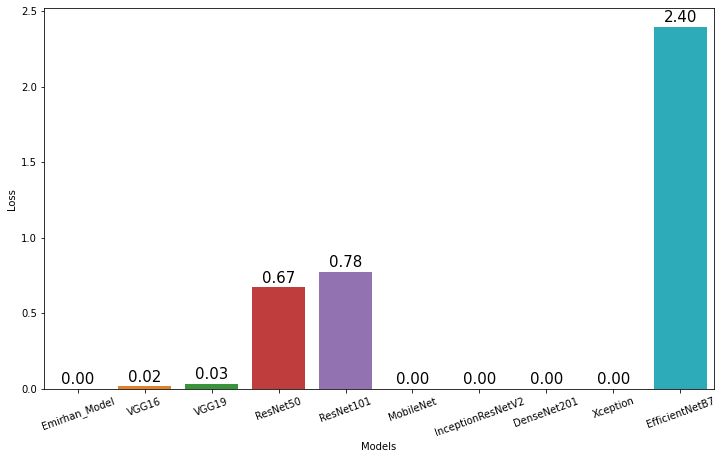

In [ ]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Loss', data=loss_result_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Loss")
plt.xticks(rotation=20);

## My Model Performance [Benchmarks Scores] 🆚

### As a Loss Variable 📈

#### **Emirhan Model vs VGG16** `🆚`

In [ ]:
rate = result_VGG16[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the VGG16 model.")

The Model (Emirhan Model) I that created has a 31.473802456162662 times higher performance loss score than the VGG16 model.


#### **Emirhan Model vs result_VGG19** `🆚`

In [ ]:
rate = result_VGG19[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the VGG19 model.")

The Model (Emirhan Model) I that created has a 54.031306833668175 times higher performance loss score than the VGG19 model.


#### **Emirhan Model vs ResNet50** `🆚`

In [ ]:
rate = result_ResNet50[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the ResNet50 model.")

The Model (Emirhan Model) I that created has a 1074.4695578840278 times higher performance loss score than the ResNet50 model.


#### **Emirhan Model vs ResNet101** `🆚`

In [ ]:
rate = result_ResNet101[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the ResNet101 model.")

The Model (Emirhan Model) I that created has a 1239.4855645504044 times higher performance loss score than the ResNet101 model.


#### **Emirhan Model vs MobileNet** `🆚`

In [ ]:
rate = result_MobileNet[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the MobileNet model.")

The Model (Emirhan Model) I that created has a 0.42361448092582615 times higher performance loss score than the MobileNet model.


#### **Emirhan Model vs InResNetV2** `🆚`

In [ ]:
rate = result_InResNetV2[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the InResNetV2 model.")

The Model (Emirhan Model) I that created has a 0.5115422428817429 times higher performance loss score than the InResNetV2 model.


#### **Emirhan Model vs DenseNet201** `🆚`

In [ ]:
rate = result_DenseNet201[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the DenseNet201 model.")

The Model (Emirhan Model) I that created has a 0.4994466531836894 times higher performance loss score than the DenseNet201 model.


#### **Emirhan Model vs Xception** `🆚`

In [ ]:
rate = result_Xception[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the Xception model.")

The Model (Emirhan Model) I that created has a 0.41633019647739555 times higher performance loss score than the Xception model.


#### **Emirhan Model vs EfficientNetB7** `🆚`

In [ ]:
rate = result_Eff[0]/result_emirhan[0]
print(f"The Model (Emirhan Model) I that created has a {rate} times higher performance loss score than the EfficientNetB7 model.")

The Model (Emirhan Model) I that created has a 3829.55188101663 times higher performance loss score than the EfficientNetB7 model.


## Prediction **`∼`**

**Prediction Data Preparing**

In [ ]:
prediction_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
prediction_generator = prediction_datagen.flow_from_directory("/content/planets",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos")

Found 1 images belonging to 1 classes.


**Load to my model**

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/model/model_48.h5")

**Basic Prediction Algorithm :))**

In [ ]:
def prediction(model,data):
  prediction = model.predict(data)
  if prediction[0].max() == prediction[0][0]:
    print("Planet Prediction is 'Earth'! ")
  elif prediction[0].max() == prediction[0][1]:
    print("Planet Prediction is 'Jupiter'! ")
  elif prediction[0].max() == prediction[0][2]:
    print("Dwarf Planet Prediction is 'Makemake'! ")
  elif prediction[0].max() == prediction[0][3]:
    print("Planet Prediction is 'Mars'! ")
  elif prediction[0].max() == prediction[0][4]:
    print("Planet Prediction is 'Mercury'! ")
  elif prediction[0].max() == prediction[0][5]:
    print("Moon Prediction is 'Moon'! ")
  elif prediction[0].max() == prediction[0][6]:
    print("Planet Prediction is 'Neptune'! ")
  elif prediction[0].max() == prediction[0][7]:
    print("Dwarf Planet Prediction is 'Pluto'! ")
  elif prediction[0].max() == prediction[0][8]:
    print("Planet Prediction is 'Saturn'! ")
  elif prediction[0].max() == prediction[0][9]:
    print("Planet Prediction is 'Uranus'! ")
  elif prediction[0].max() == prediction[0][10]:
    print("Planet Prediction is 'Venus'! ")

***Predict to data***

In [ ]:
prediction(model,prediction_generator)

Planet Prediction is 'Earth'! 


**Earth Visualization**

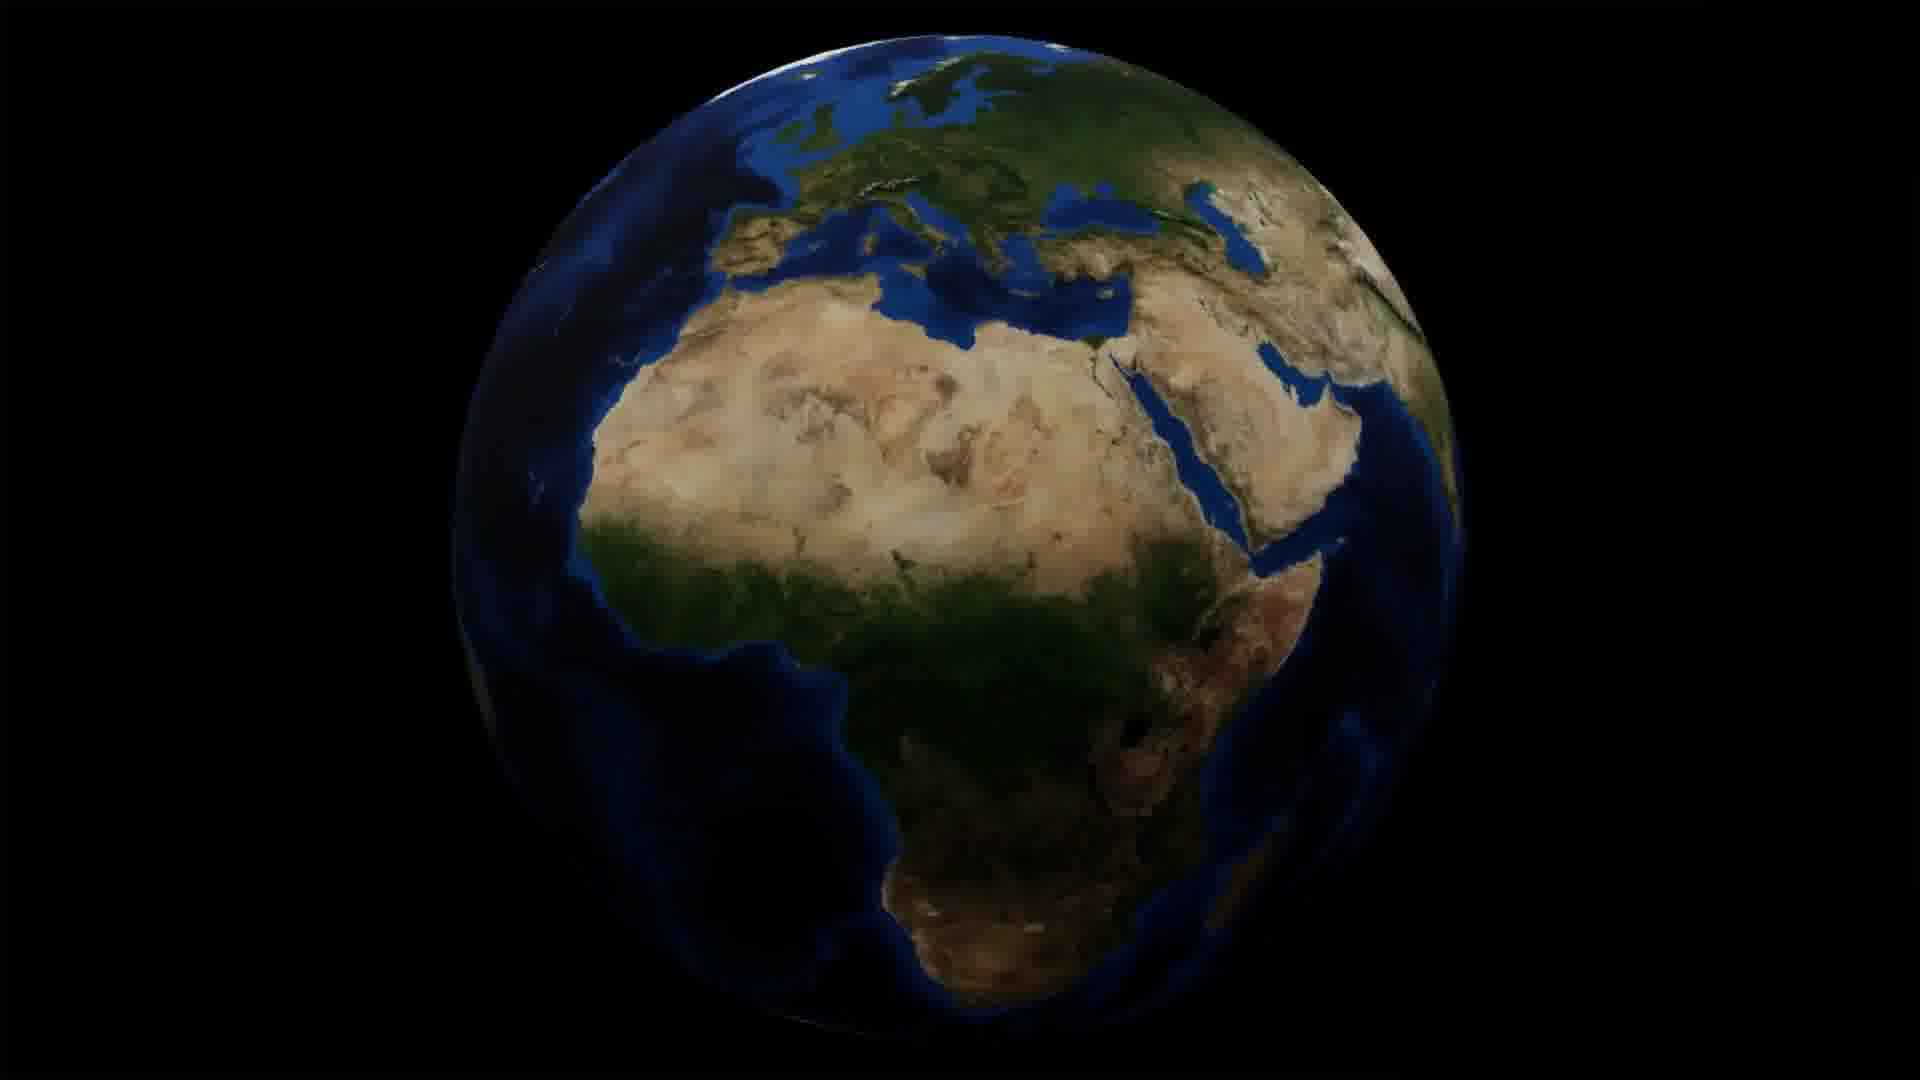

In [ ]:
from PIL import Image
Image.open("/content/planets/planet/Earth.jpg")

**Prediction Data Preparing**

In [ ]:
prediction_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
prediction_generator = prediction_datagen.flow_from_directory("/content/planets",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos")

Found 1 images belonging to 1 classes.


***Predict to data***

In [ ]:
prediction(model,prediction_generator)

Planet Prediction is 'Mars'! 


**Mars Visualization**

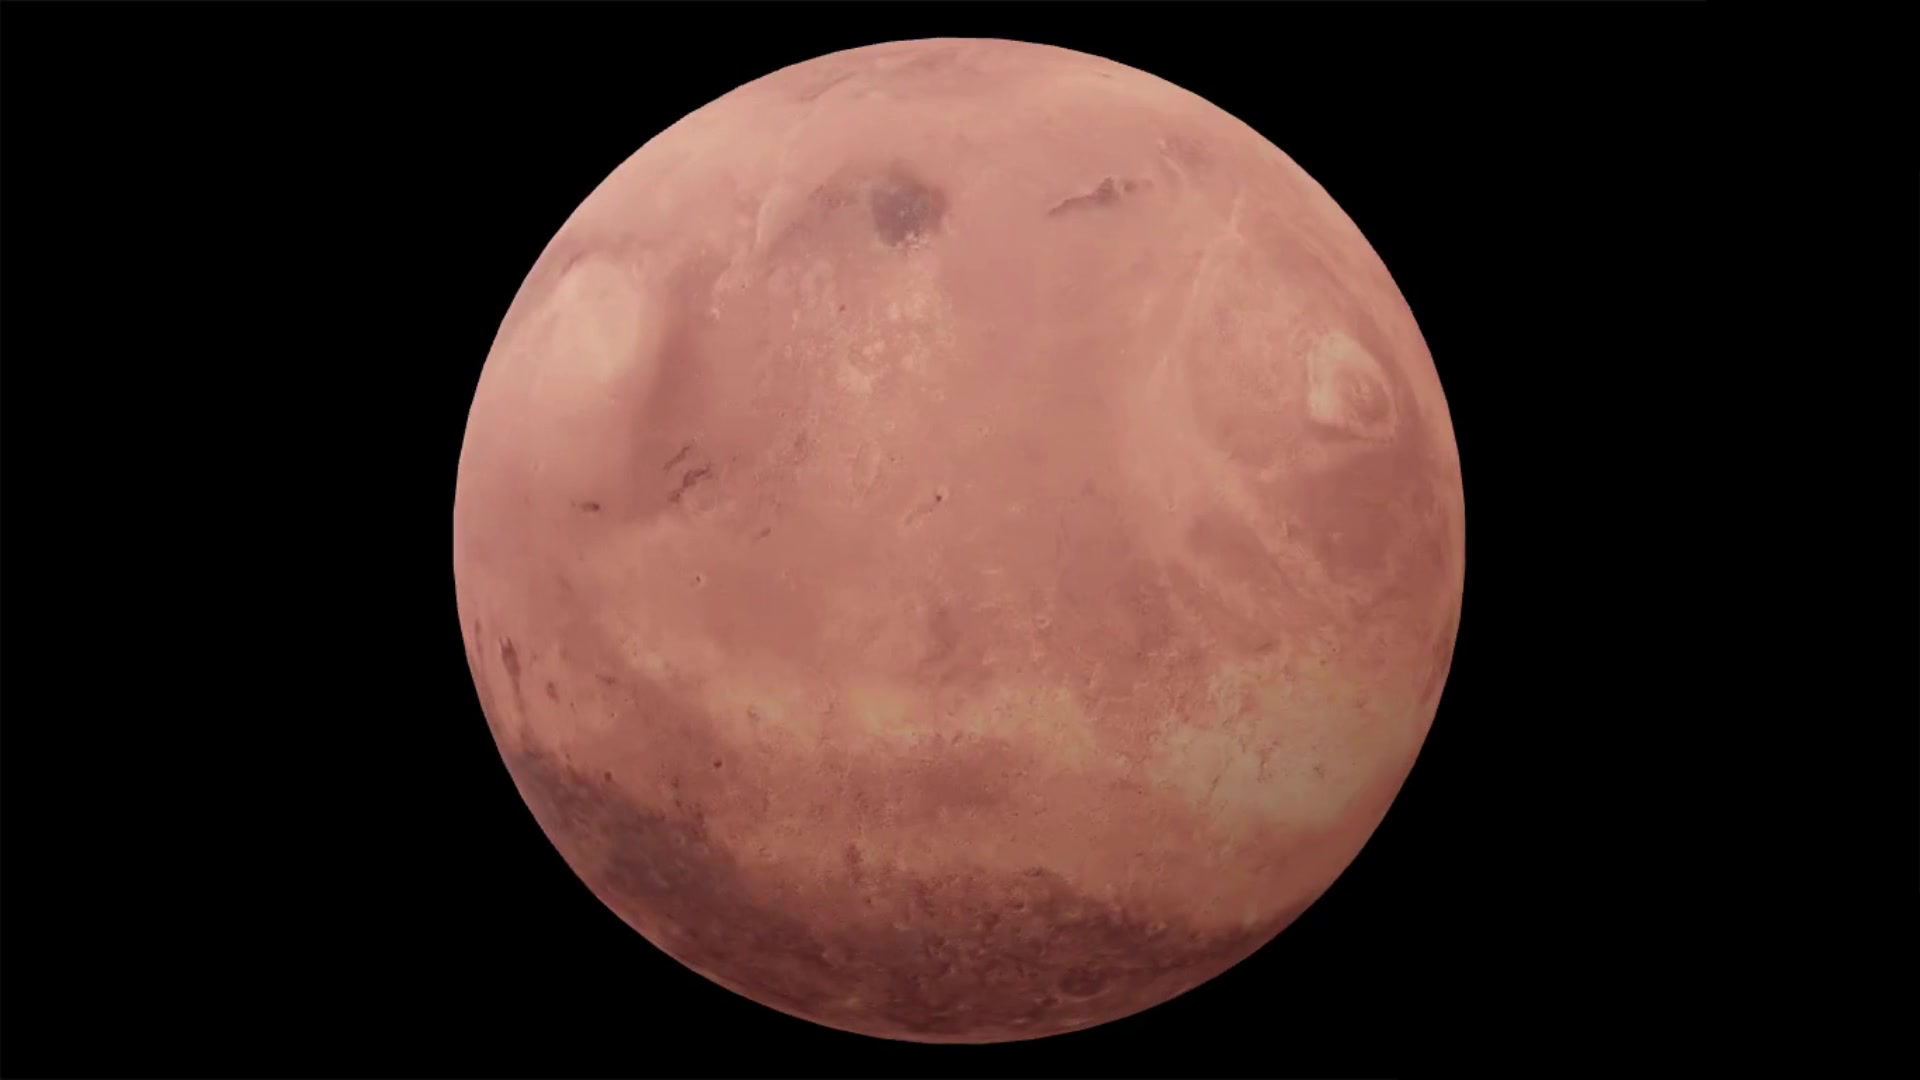

In [ ]:
from PIL import Image
Image.open("/content/planets/planet/Mars.jpg")

**Prediction Data Preparing**

In [ ]:
prediction_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)
prediction_generator = prediction_datagen.flow_from_directory("/content/planets",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos")

Found 1 images belonging to 1 classes.


***Predict to data***

In [ ]:
prediction(model,prediction_generator)

Planet Prediction is 'Jupiter'! 


**Jupiter Visualization**

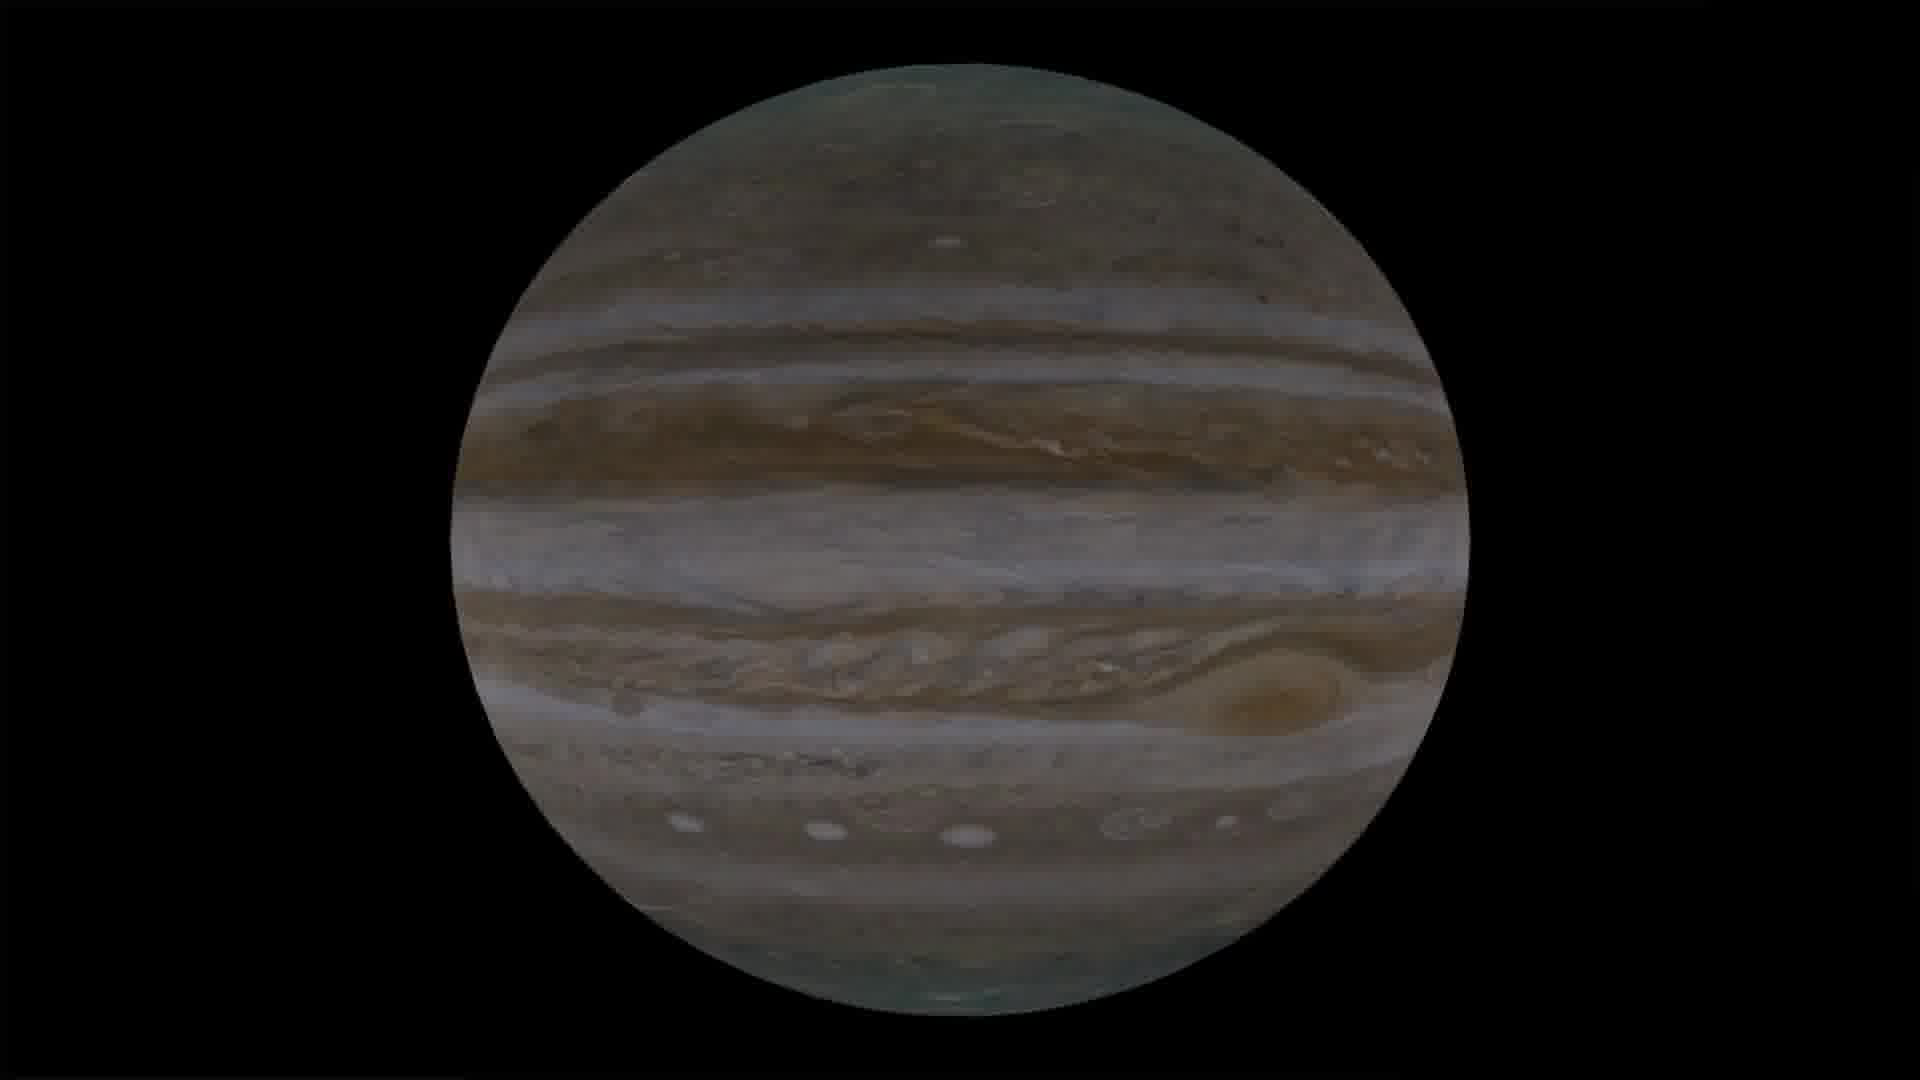

In [ ]:
from PIL import Image
Image.open("/content/planets/planet/Jupiter.jpg")